In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

#from sklearn.datasets import fetch_openml

In [31]:
%ls airline.csv

airline.csv


In [32]:
air = np.loadtxt('airline.csv')

In [33]:
x = air[: ,0]
y = air[:, 1]
stop = 96

In [34]:
x.shape

(144,)

In [35]:
y.shape

(144,)

In [36]:
from sklearn import preprocessing
#import random

#random.seed(23)

#idx = random.sample(range(len(x)), 50)

x_new = (x - min(x))/(max(x)-min(x))

scaler = preprocessing.StandardScaler().fit(y.reshape(-1,1))

y_new = scaler.transform(y.reshape(-1,1))


#train_gx = x_new[idx][:,None]
#train_gy = y_new[idx] + 0.0001 * np.random.normal(0,1,50)[:,None]

train_x = x_new[:stop][:,None]
train_y = y_new[:stop]

test_x = x_new[stop:][:,None]
test_y = y_new[stop:]

In [37]:
train_x.shape, test_x.shape

((96, 1), (48, 1))

In [38]:
train_y.shape, test_y.shape

((96, 1), (48, 1))

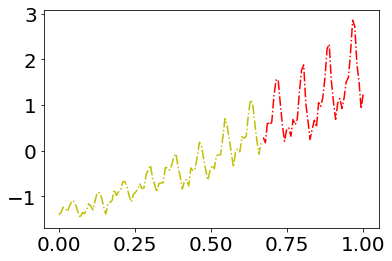

In [39]:
plt.plot(train_x,train_y, 'y-.')
plt.plot(test_x,test_y, 'r-.')

In [40]:
import GPy
from GPy.kern import Kern
from GPy import Param, Model

In [41]:
from deepRBF import deepRBF

d_rbf = deepRBF(input_dim=1,variance1=0.01,lengthscale=0.001)
m3 = GPy.models.GPRegression(train_x, train_y, d_rbf)
m3.optimize()
m3.optimize_restarts(num_restarts = 20)

Optimization restart 1/20, f = 89.63638174162189
Optimization restart 2/20, f = 12.330048573004305
Optimization restart 3/20, f = 12.37086393118227
Optimization restart 4/20, f = 12.330051630834483
Optimization restart 5/20, f = 12.330058872305614
Optimization restart 6/20, f = -17.076452120648042
Optimization restart 7/20, f = 12.351496754980474
Optimization restart 8/20, f = 12.33041677840172
Optimization restart 9/20, f = 12.330116216571483
Optimization restart 10/20, f = 12.330068310029517
Optimization restart 11/20, f = 12.330058348169608
Optimization restart 12/20, f = 12.33005209058095
Optimization restart 13/20, f = -20.884569065401756
Optimization restart 14/20, f = 12.330061677315008
Optimization restart 15/20, f = 12.36659140614897
Optimization restart 16/20, f = 12.330060405155706
Optimization restart 17/20, f = 12.33005116517981
Optimization restart 18/20, f = 12.33052026663215
Optimization restart 19/20, f = 12.330051653875465
Optimization restart 20/20, f = 12.3300565192

In [42]:
X_test = np.linspace(0,1,199)[:,None]

mu, var = m3.predict(X_test)

X_plot = np.linspace(0,1,200)[:,None]

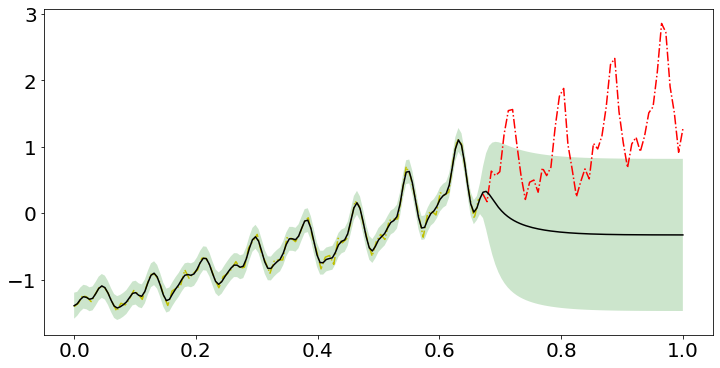

In [43]:
pred_up = mu + 1.96 * np.sqrt(var)
pred_down = mu - 1.96 * np.sqrt(var)

import matplotlib 

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(test_x,test_y,'r-.')
plt.plot(train_x,train_y,'y-.')
#plt.plot(X_plot,f_e,'r-.')
#plt.plot(X_plot,f_c,'b.')
plt.plot(X_test, mu,'k-',linewidth=1.5)
#plt.title('SE[SE]')
plt.fill_between(np.array(X_test).flatten(),np.array(pred_up).flatten(),np.array(pred_down).flatten(),facecolor='g',alpha=0.2)

In [44]:
fig.savefig('demo_airline_sese.pdf', bbox_inches='tight')

In [45]:
kernel1 = GPy.kern.RBF(input_dim = 1,variance=1,lengthscale=0.01) 
kernel2 = GPy.kern.PeriodicExponential()

m1 = GPy.models.GPRegression(train_x, train_y, kernel1)
m1.optimize()
m1.optimize_restarts(num_restarts = 20)

Optimization restart 1/20, f = 11.678667765362185
Optimization restart 2/20, f = 11.67866776475607
Optimization restart 3/20, f = 11.678667764758288
Optimization restart 4/20, f = 11.67866776475617
Optimization restart 5/20, f = 11.678667780667233
Optimization restart 6/20, f = 11.678667765260471
Optimization restart 7/20, f = 11.678667764765905
Optimization restart 8/20, f = 11.678667764756185
Optimization restart 9/20, f = 11.678667764806875
Optimization restart 10/20, f = 11.678667764810974
Optimization restart 11/20, f = 11.678667783257282
Optimization restart 12/20, f = 11.678667764934161
Optimization restart 13/20, f = 11.678667764896204
Optimization restart 14/20, f = 11.678667764762338
Optimization restart 15/20, f = 11.678667764756995
Optimization restart 16/20, f = 11.678667764782574
Optimization restart 17/20, f = 11.678667764832511
Optimization restart 18/20, f = 11.678667765302038
Optimization restart 19/20, f = 11.678667764757243
Optimization restart 20/20, f = 11.6786677

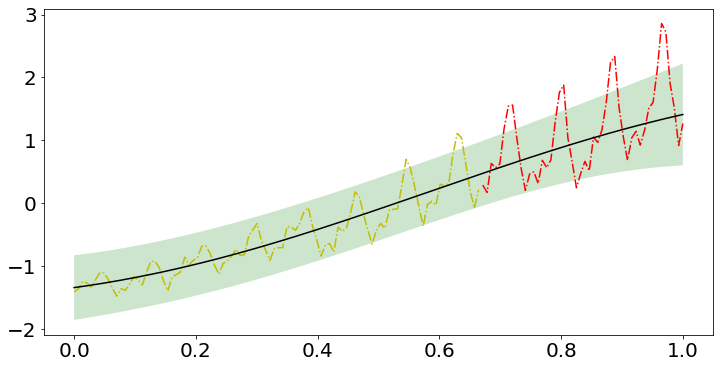

In [46]:
mu1, var1 = m1.predict(X_test)

pred_up1 = mu1 + 1.96 * np.sqrt(var1)
pred_down1 = mu1 - 1.96 * np.sqrt(var1)

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(test_x,test_y,'r-.')
plt.plot(train_x,train_y,'y-.')
#plt.plot(X_plot,f_e,'r-.')
#plt.plot(X_plot,f_c,'b.')
plt.plot(X_test, mu1,'k-',linewidth=1.5)
#plt.title('SE')
plt.fill_between(np.array(X_test).flatten(),np.array(pred_up1).flatten(),np.array(pred_down1).flatten(),facecolor='g',alpha=0.2)

In [47]:
fig.savefig('demo_airline_se.pdf', bbox_inches='tight')

In [48]:
kernel3 = GPy.kern.sde_RatQuad(input_dim=1)

model_book = GPy.models.GPRegression(train_x, train_y, kernel1+kernel2+kernel3)
model_book.optimize()
model_book.optimize_restarts(num_restarts = 20)

 /Users/felix/anaconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 1/20, f = 11.50531305466317
Optimization restart 2/20, f = -26.876578873271576
Optimization restart 3/20, f = -16.82893951434872
Optimization restart 4/20, f = -16.84790520748072
Optimization restart 5/20, f = -81.9206489565703
Optimization restart 6/20, f = -7.695630405392983
Optimization restart 7/20, f = -42.633561501698225
Optimization restart 8/20, f = -17.32508311652903
Optimization restart 9/20, f = -17.32508984273344
Optimization restart 10/20, f = -41.80331301671407
Optimization restart 11/20, f = -40.819795846332795
Optimization restart 12/20, f = -17.32508167105174
Optimization restart 13/20, f = 11.678644146924952
Optimization restart 14/20, f = -16.847918408372294
Optimization restart 15/20, f = -40.81979109969309
Optimization restart 16/20, f = -17.32500733353872
Optimization restart 17/20, f = -17.325089596793184
Optimization restart 18/20, f = -26.54989544140551
Optimization restart 19/20, f = 11.613951239802446
Optimization restart 20/20, f = -17.3

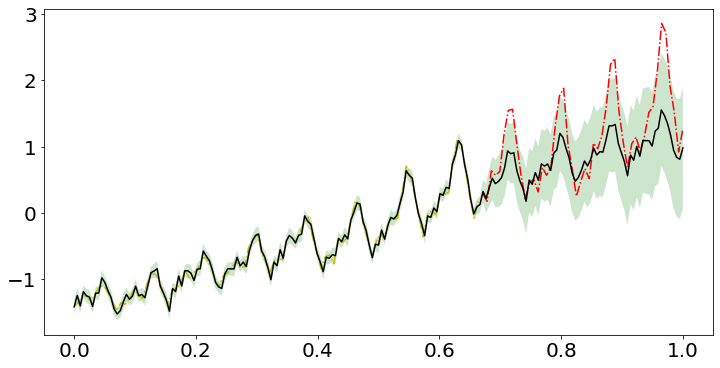

In [49]:
mu2, var2 = model_book.predict(X_test)

pred_up2 = mu2 + 1.96 * np.sqrt(var2)
pred_down2 = mu2 - 1.96 * np.sqrt(var2)

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(test_x,test_y,'r-.')
plt.plot(train_x,train_y,'y-.')
#plt.plot(X_plot,f_e,'r-.')
#plt.plot(X_plot,f_c,'b.')
plt.plot(X_test, mu2,'k-',linewidth=1.5)
#plt.title('SE+PeriodSE+RQ')
plt.fill_between(np.array(X_test).flatten(),np.array(pred_up2).flatten(),np.array(pred_down2).flatten(),facecolor='g',alpha=0.2)

In [50]:
fig.savefig('demo_airline_book.pdf', bbox_inches='tight')

In [51]:
model_book.log_likelihood()

81.9206489565703

In [52]:
m3.log_likelihood()

20.884569065401756

In [53]:
m1.log_likelihood()

-11.67866776475607